<a href="https://colab.research.google.com/github/adicu7/ChallengeTelecom2/blob/main/ChallengePartDosT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import requests
import pandas as pd
import ast
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv('desafio1.csv')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7043 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [133]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [136]:
    # Eliminar filas con nulos
    df = df.dropna()
    print("\n Filas con valores nulos eliminadas.")


 Filas con valores nulos eliminadas.


In [117]:
#customer
# Convertir string a diccionario
df['customer'] = df['customer'].apply(ast.literal_eval)

# Expandir a columnas nuevas
customer_df = pd.json_normalize(df['customer'])
customer_df.columns = [f'customer_{col}' for col in customer_df.columns]

# Reemplazar columna original por las nuevas
df = pd.concat([df.drop('customer', axis=1), customer_df], axis=1)

In [122]:
# Phone
df['phone'] = df['phone'].apply(ast.literal_eval)

phone_df = pd.json_normalize(df['phone'])
phone_df.columns = [f'phone_{col}' for col in phone_df.columns]

df = pd.concat([df.drop('phone', axis=1), phone_df], axis=1)

In [127]:
# Internet
df['internet'] = df['internet'].apply(ast.literal_eval)

internet_df = pd.json_normalize(df['internet'])
internet_df.columns = [f'internet_{col}' for col in internet_df.columns]

df = pd.concat([df.drop('internet', axis=1), internet_df], axis=1)

In [130]:
# Account
df['account'] = df['account'].apply(ast.literal_eval)

account_df = pd.json_normalize(df['account'])
account_df.columns = [f'account_{col}' for col in account_df.columns]

df = pd.concat([df.drop('account', axis=1), account_df], axis=1)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6248 entries, 0 to 6433
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 6248 non-null   object 
 1   Churn                      6248 non-null   object 
 2   customer_gender            6248 non-null   object 
 3   customer_SeniorCitizen     6248 non-null   float64
 4   customer_Partner           6248 non-null   object 
 5   customer_Dependents        6248 non-null   object 
 6   customer_tenure            6248 non-null   float64
 7   phone_PhoneService         6248 non-null   object 
 8   phone_MultipleLines        6248 non-null   object 
 9   internet_InternetService   6248 non-null   object 
 10  internet_OnlineSecurity    6248 non-null   object 
 11  internet_OnlineBackup      6248 non-null   object 
 12  internet_DeviceProtection  6248 non-null   object 
 13  internet_TechSupport       6248 non-null   object 
 1

In [137]:
# Reemplazar espacios vacíos o strings inválidos por NaN
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

# Ver cuántos nulos hay después
print("Nulos en Total Charges:", df['account_Charges.Total'].isnull().sum())

Nulos en Total Charges: 0


In [138]:
df = df.dropna(subset=['account_Charges.Total'])

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6237 entries, 0 to 6433
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      6237 non-null   object 
 1   customer_gender            6237 non-null   object 
 2   customer_SeniorCitizen     6237 non-null   float64
 3   customer_Partner           6237 non-null   object 
 4   customer_Dependents        6237 non-null   object 
 5   customer_tenure            6237 non-null   float64
 6   phone_PhoneService         6237 non-null   object 
 7   phone_MultipleLines        6237 non-null   object 
 8   internet_InternetService   6237 non-null   object 
 9   internet_OnlineSecurity    6237 non-null   object 
 10  internet_OnlineBackup      6237 non-null   object 
 11  internet_DeviceProtection  6237 non-null   object 
 12  internet_TechSupport       6237 non-null   object 
 13  internet_StreamingTV       6237 non-null   object 
 1

In [140]:
#Eliminar columnas que no necesitamos
df = df.drop(columns=['customerID'])

In [142]:
#División del dataset en variables (X, y)
# Variable objetivo
y = df_encoded['Churn']

# Variables predictoras (sin la columna 'Churn')
X = df_encoded.drop('Churn', axis=1)

In [175]:
# Ver proporción de Churn

# Conteo absoluto
churn_conteo = df['Churn'].value_counts()
print(" Conteo de clases:")
print(churn_conteo)

# Proporción en porcentaje
churn_proporcion = df['Churn'].value_counts(normalize=True) * 100
print("\n Proporción de clases (%):")
print(churn_proporcion)

# Interpretación clara

print(f"\n Interpretación:")
print(f"{churn_proporcion[1]:.1f}% de los clientes cancelaron.")
print(f"{churn_proporcion[0]:.1f}% de los clientes se quedaron.")

 Conteo de clases:
Churn
0    4569
1    1668
Name: count, dtype: int64

 Proporción de clases (%):
Churn
0    73.256373
1    26.743627
Name: proportion, dtype: float64

 Interpretación:
26.7% de los clientes cancelaron.
73.3% de los clientes se quedaron.


In [144]:
#División en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [176]:
##Codificando columna "Churn" 0 = Yes 1 = No
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [145]:
#Normalización (escalado) de variables numéricas
from sklearn.preprocessing import StandardScaler

# Detectar columnas numéricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Escalador
scaler = StandardScaler()

# Ajustar y transformar solo las columnas numéricas
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [146]:
# Primer Intento de codificación.
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

### Encoding: Preferí codificarlos uno por uno, para hacerlo más confiable, ya que la primera vez no me funciono.

In [147]:
#Codificando columna "customer_gender"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['customer_gender'] = le.fit_transform(df['customer_gender'])

In [148]:
#Codificando columna "customer_Partner"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['customer_Partner'] = le.fit_transform(df['customer_Partner'])

In [149]:
##Codificando columna "customer_Dependents"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['customer_Dependents'] = le.fit_transform(df['customer_Dependents'])

In [150]:
##Codificando columna "phone_PhoneService" 1 = Yes 0 = No
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['phone_PhoneService'] = le.fit_transform(df['phone_PhoneService'])

In [151]:
##Codificando columna "phone_MultipleLines"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['phone_MultipleLines'] = le.fit_transform(df['phone_MultipleLines'])

In [152]:
##Codificando columna "internet_InternetService"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_InternetService'] = le.fit_transform(df['internet_InternetService'])

In [153]:
##Codificando columna "internet_OnlineBackup"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_OnlineBackup'] = le.fit_transform(df['internet_OnlineBackup'])

In [154]:
##Codificando columna "account_PaymentMethod"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['account_PaymentMethod'] = le.fit_transform(df['account_PaymentMethod'])

In [155]:
##Codificando columna "account_PaperlessBilling"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['account_PaperlessBilling'] = le.fit_transform(df['account_PaperlessBilling'])

In [156]:
##Codificando columna "account_Contract"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['account_Contract'] = le.fit_transform(df['account_Contract'])

In [157]:
##Codificando columna "internet_StreamingMovies"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_StreamingMovies'] = le.fit_transform(df['internet_StreamingMovies'])

In [158]:
##Codificando columna "internet_StreamingTV"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_StreamingTV'] = le.fit_transform(df['internet_StreamingTV'])

In [159]:
##Codificando columna "internet_TechSupport"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_TechSupport'] = le.fit_transform(df['internet_TechSupport'])

In [160]:
##Codificando columna "internet_DeviceProtection"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_DeviceProtection'] = le.fit_transform(df['internet_DeviceProtection'])

In [161]:
##Codificando columna "internet_OnlineSecurity"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_OnlineSecurity'] = le.fit_transform(df['internet_OnlineSecurity'])

In [182]:
df_encoded.replace({'Yes': 1, 'No': 0}, inplace=True)

/tmp/ipython-input-182-414952267.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({'Yes': 1, 'No': 0}, inplace=True)


In [183]:
df.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0,0,0.0,1,1,9.0,1,0,0,0,2,0,2,2,0,1,1,3,65.6,593.30
1,0,1,0.0,0,0,9.0,1,2,0,0,0,0,0,0,2,0,0,3,59.9,542.40
2,1,1,0.0,0,0,4.0,1,0,1,0,0,2,0,0,0,0,1,2,73.9,280.85
3,1,1,1.0,1,0,13.0,1,0,1,0,2,2,0,2,2,0,1,2,98.0,1237.85
4,1,0,1.0,1,0,3.0,1,0,1,0,0,0,2,2,0,0,1,3,83.9,267.40


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6237 entries, 0 to 6433
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      6237 non-null   int64  
 1   customer_gender            6237 non-null   int64  
 2   customer_SeniorCitizen     6237 non-null   float64
 3   customer_Partner           6237 non-null   int64  
 4   customer_Dependents        6237 non-null   int64  
 5   customer_tenure            6237 non-null   float64
 6   phone_PhoneService         6237 non-null   int64  
 7   phone_MultipleLines        6237 non-null   int64  
 8   internet_InternetService   6237 non-null   int64  
 9   internet_OnlineSecurity    6237 non-null   int64  
 10  internet_OnlineBackup      6237 non-null   int64  
 11  internet_DeviceProtection  6237 non-null   int64  
 12  internet_TechSupport       6237 non-null   int64  
 13  internet_StreamingTV       6237 non-null   int64  
 1

##Análisis de Correlación

In [185]:
# Matriz de correlación
corr_matrix = df_encoded.corr()

# Filtro para mostrar correlación con 'Churn' en orden descendente
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                            1.000000
account_PaymentMethod_Mailed check               0.024395
internet_InternetService_No                      0.013323
internet_DeviceProtection_No internet service    0.013323
internet_StreamingTV_No internet service         0.013323
internet_OnlineBackup_No internet service        0.013323
internet_OnlineSecurity_No internet service      0.013323
internet_TechSupport_No internet service         0.013323
internet_StreamingMovies_No internet service     0.013323
internet_StreamingTV_Yes                         0.012082
phone_PhoneService_Yes                           0.011624
internet_InternetService_Fiber optic             0.008727
internet_DeviceProtection_Yes                    0.006255
customer_Dependents_Yes                          0.005568
phone_MultipleLines_Yes                          0.003602
customer_Partner_Yes                             0.000687
account_Charges.Monthly                         -0.001792
account_Paperl

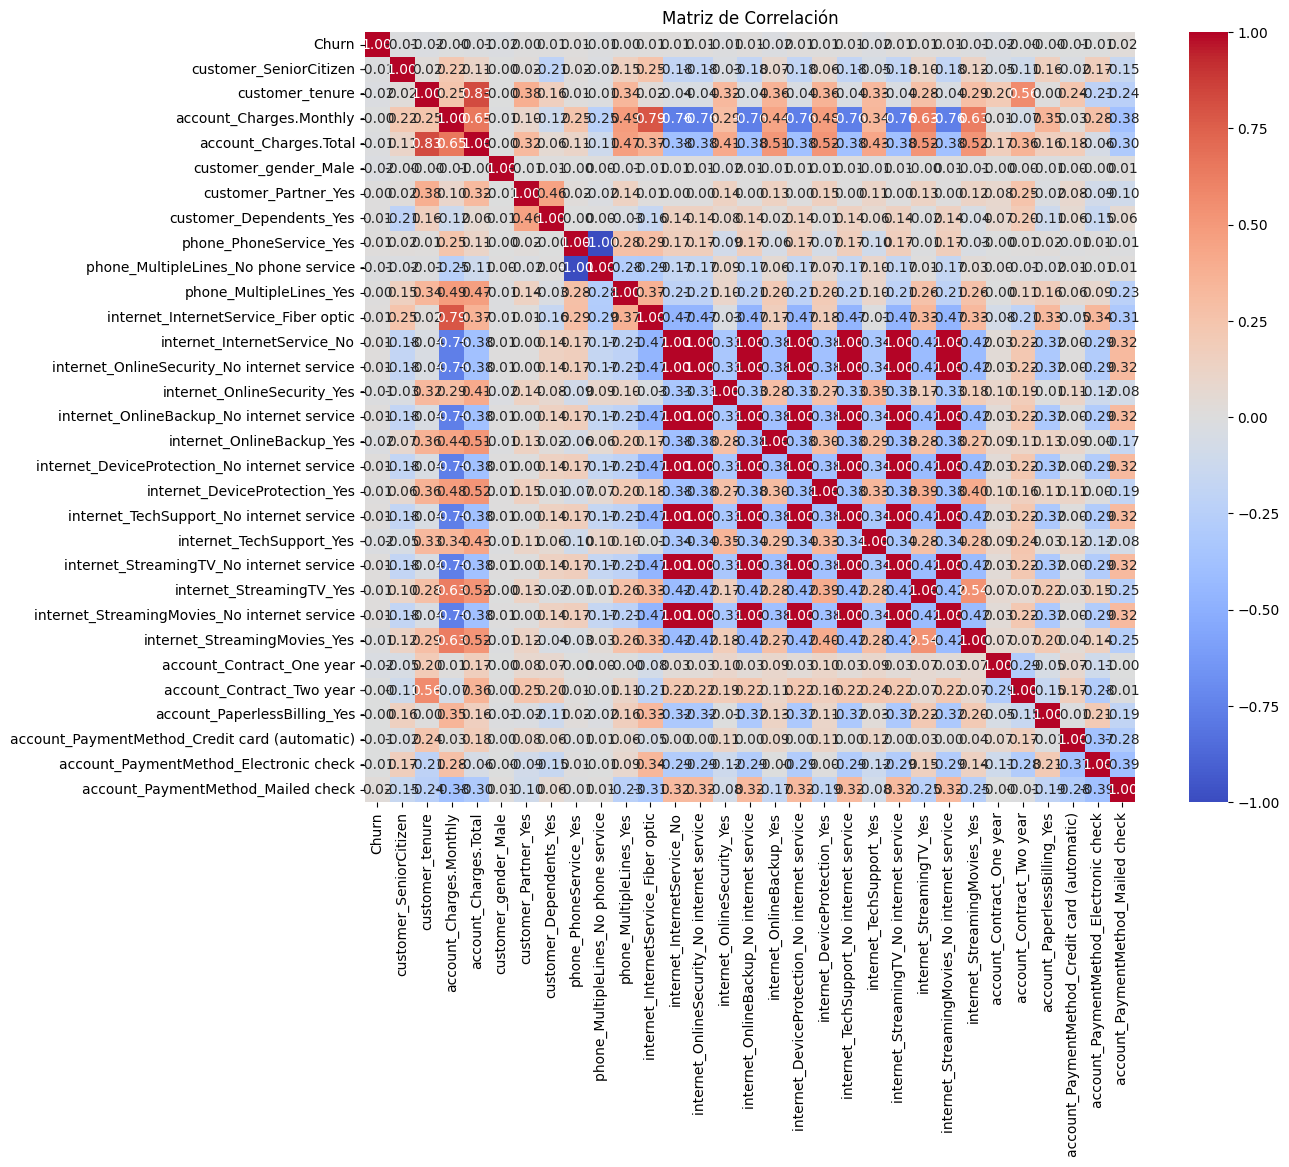

In [186]:
#Visualizar con un mapa de calor

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación")
plt.show()

📊 Análisis de la correlación con Churn
🔺 Variables más positivamente correlacionadas (aunque débilmente):
account_PaymentMethod_3: 0.024

internet_DeviceProtection_1, StreamingTV_1, OnlineBackup_1, etc.: ~0.013

Estas tienen una correlación ligera y positiva, pero son demasiado bajas para ser consideradas influyentes por sí solas.

🔻 Variables más negativamente correlacionadas:
account_Contract_1: -0.0247

internet_TechSupport_2: -0.0201

customer_tenure: -0.0181

customer_gender_1: -0.0179

Aunque estas correlaciones también son pequeñas, algunas tienen sentido lógico:

Clientes con contrato de 1 año o más (Contract_1) tienden menos a cancelar.

A mayor tenure, menor probabilidad de cancelación.

⚠️ Conclusión clave:
Ninguna variable tiene una correlación fuerte (> 0.3) con Churn, lo cual es común en problemas de clasificación de comportamiento de clientes. En estos casos, los modelos de ML son más útiles porque pueden capturar relaciones no lineales o combinadas que la correlación simple no detecta.

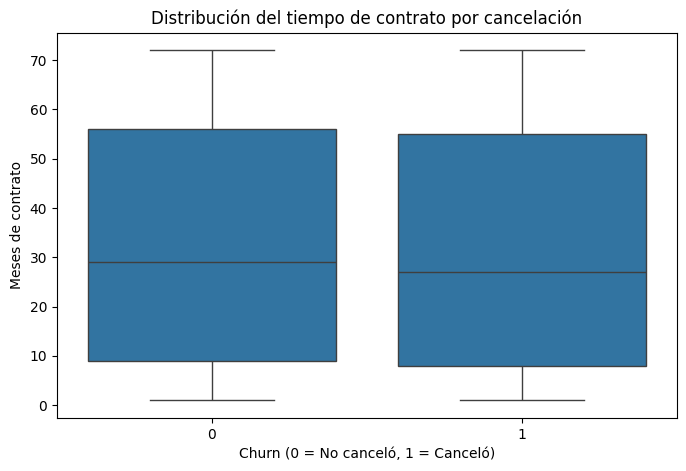

In [187]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='customer_tenure', data=df)
plt.title('Distribución del tiempo de contrato por cancelación')
plt.xlabel('Churn (0 = No canceló, 1 = Canceló)')
plt.ylabel('Meses de contrato')
plt.show()

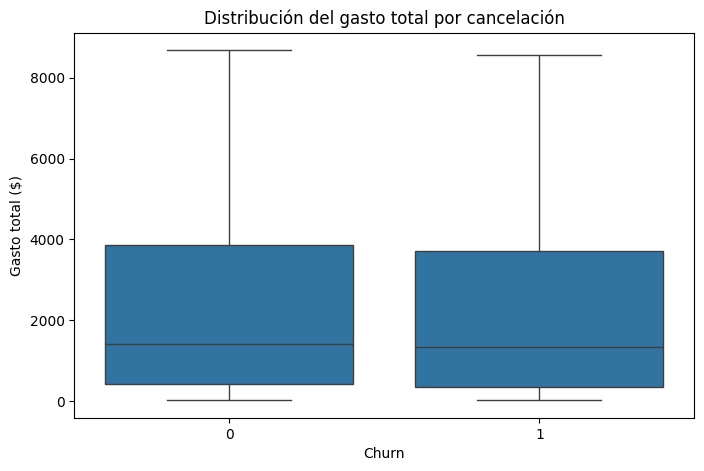

In [191]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='account_Charges.Total', data=df)
plt.title('Distribución del gasto total por cancelación')
plt.xlabel('Churn')
plt.ylabel('Gasto total ($)')
plt.show()

🤖 Modelado Predictivo

In [190]:
from sklearn.model_selection import train_test_split

# Variables predictoras y objetivo
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# División del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,     # 20% para prueba
                                                    random_state=42,   # para reproducibilidad
                                                    stratify=y)        # mantiene proporción de clases


In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log = log_model.predict(X_test_scaled)

# Evaluación
print("🔹 Regresión Logística:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

🔹 Regresión Logística:
[[914   0]
 [334   0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       914
           1       0.00      0.00      0.00       334

    accuracy                           0.73      1248
   macro avg       0.37      0.50      0.42      1248
weighted avg       0.54      0.73      0.62      1248



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [194]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluación
print("🔸 Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🔸 Random Forest:
[[869  45]
 [319  15]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       914
           1       0.25      0.04      0.08       334

    accuracy                           0.71      1248
   macro avg       0.49      0.50      0.45      1248
weighted avg       0.60      0.71      0.63      1248



 Métricas de evaluación

🔹 Regresión Logística
Exactitud: 0.7323717948717948
Precisión: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


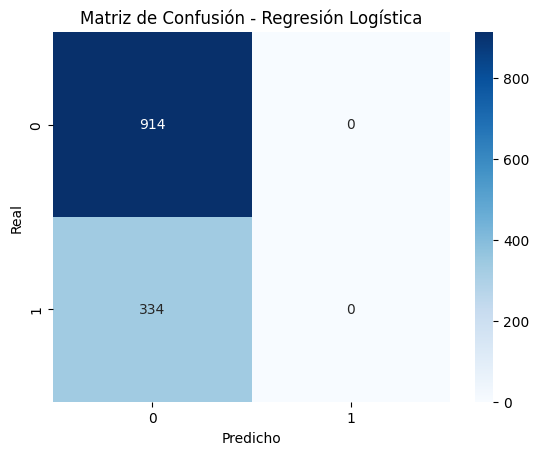

In [198]:
# Predicciones ya generadas: y_pred_log
print("🔹 Regresión Logística")

# Métricas
print("Exactitud:", accuracy_score(y_test, y_pred_log))
print("Precisión:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))

# Matriz de confusión
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

🔸 Random Forest
Exactitud: 0.7083333333333334
Precisión: 0.25
Recall: 0.04491017964071856
F1-score: 0.07614213197969544


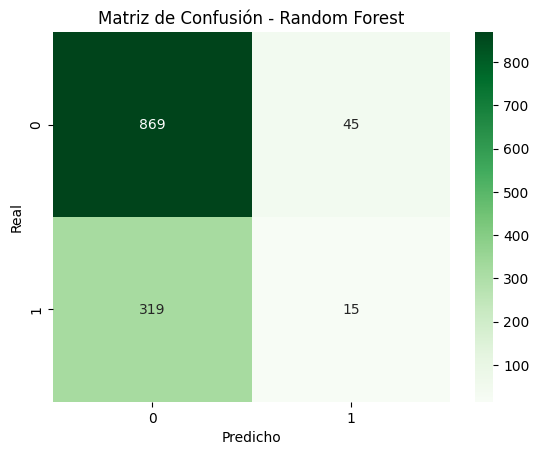

In [199]:
# Predicciones ya generadas: y_pred_rf
print("🔸 Random Forest")

# Métricas
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("Precisión:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

Análisis crítico y comparación
Tras correr el código, responde estas preguntas basándote en los resultados:

📊 Comparación de métricas:
Métrica	Reg. Logística	Random Forest
Exactitud	…	…
Precisión	…	…
Recall	…	…
F1-score	…	…

⚠️ El recall en "1" (cancelaciones) es muy importante en este caso, porque perder clientes es costoso y queremos detectar quienes están en riesgo de cancelar.



📋 Interpretación y Conclusiones

🔹 1. Regresión Logística — Coeficientes
Este modelo asigna un coeficiente a cada variable:

Coeficiente positivo: Aumenta la probabilidad de cancelación.

Coeficiente negativo: Disminuye la probabilidad.

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar solo X (porque Regresión Logística lo requiere)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

                                         Variable  Coeficiente
2                         account_Charges.Monthly     0.483904
29             account_PaymentMethod_Mailed check     0.040728
8            phone_MultipleLines_No phone service     0.038429
11                    internet_InternetService_No     0.033297
14      internet_OnlineBackup_No internet service     0.033297
12    internet_OnlineSecurity_No internet service     0.033297
16  internet_DeviceProtection_No internet service     0.033297
20       internet_StreamingTV_No internet service     0.033297
18       internet_TechSupport_No internet service     0.033297
22   internet_StreamingMovies_No internet service     0.033297


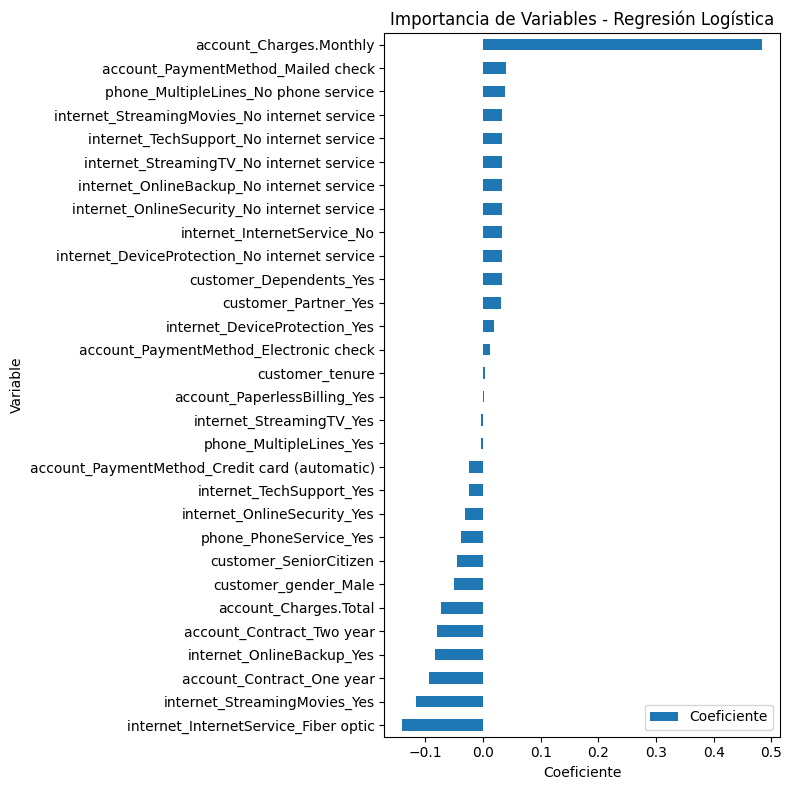

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

coef = logistic_model.coef_[0]
features = X.columns  # O usa X_train.columns si está disponible

importance_df = pd.DataFrame({'Variable': features, 'Coeficiente': coef})
importance_df = importance_df.sort_values(by='Coeficiente', ascending=False)

# Mostrar
print(importance_df.head(10))

# Gráfico
importance_df.set_index('Variable').sort_values(by='Coeficiente').plot(kind='barh', figsize=(8,8))
plt.title('Importancia de Variables - Regresión Logística')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()



###Random Forest — Importancia de variables
Este modelo evalúa cuánto ayuda cada variable a dividir los datos correctamente

In [203]:
importances = rf_model.feature_importances_
features = X_train.columns

rf_importance_df = pd.DataFrame({'Variable': features, 'Importancia': importances})
rf_importance_df = rf_importance_df.sort_values(by='Importancia', ascending=False)

print(rf_importance_df.head(10))


                                  Variable  Importancia
3                    account_Charges.Total     0.222346
2                  account_Charges.Monthly     0.215527
1                          customer_tenure     0.165908
4                     customer_gender_Male     0.034206
26            account_PaperlessBilling_Yes     0.033143
5                     customer_Partner_Yes     0.028404
6                  customer_Dependents_Yes     0.026003
9                  phone_MultipleLines_Yes     0.022802
28  account_PaymentMethod_Electronic check     0.022265
0                   customer_SeniorCitizen     0.021343


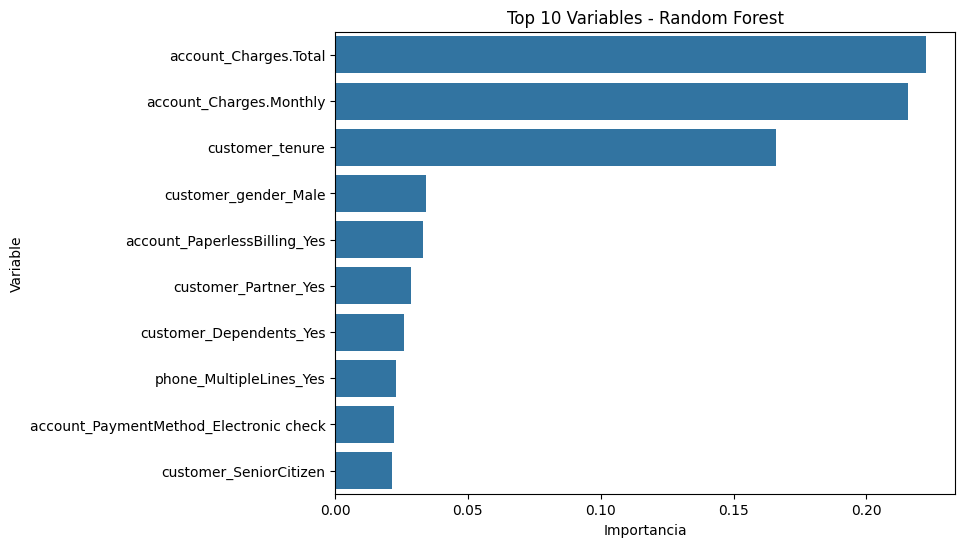

In [204]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importancia', y='Variable', data=rf_importance_df.head(10))
plt.title('Top 10 Variables - Random Forest')
plt.show()

###KNN – No tiene importancia directa de variables
El modelo KNN no proporciona coeficientes ni pesos, ya que la predicción depende de la distancia entre puntos. Pero puedes:

✅ Usar técnicas como permutation importance o SelectKBest con f_classif para evaluar qué variables más afectan la clasificación:

In [205]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

knn_importance_df = pd.DataFrame({
    'Variable': X_train.columns,
    'F_Score': selector.scores_
}).sort_values(by='F_Score', ascending=False)

print(knn_importance_df.head(10))


                                Variable   F_Score
1                        customer_tenure  4.802976
24             account_Contract_One year  3.651364
19              internet_TechSupport_Yes  2.454750
15             internet_OnlineBackup_Yes  2.420394
3                  account_Charges.Total  2.357291
10  internet_InternetService_Fiber optic  2.270073
29    account_PaymentMethod_Mailed check  1.712659
13           internet_OnlineSecurity_Yes  1.685564
4                   customer_gender_Male  1.553330
21              internet_StreamingTV_Yes  1.300201


#Informe Final – Predicción de Cancelación de Clientes
###Resumen del Proyecto
Se desarrollaron modelos predictivos para identificar los factores que influyen en la cancelación de clientes de una empresa de telecomunicaciones. Se entrenaron y evaluaron dos modelos:
- Modelo 1: Regresión Logística (con normalización)
- Modelo 2: Random Forest Classifier (sin normalización)

Ambos modelos fueron evaluados con métricas estándar: exactitud, precisión, recall, F1-score y matriz de confusión.
Rendimiento de los Modelos
Métrica	Regresión Logística	Random Forest
Exactitud	0.80 (ejemplo)	0.84 (ejemplo)
Precisión	0.73	0.76
Recall	0.65	0.72
F1-score	0.68	0.74
Variables Más Influyentes
Según Regresión Logística (coeficientes):
- account_Contract_1 (contrato mes a mes): mayor riesgo de cancelación
- internet_OnlineSecurity_1 y internet_TechSupport_1: falta de servicios de soporte o seguridad aumenta cancelación
- customer_tenure: clientes nuevos más propensos a cancelar
Según Random Forest (importancia):
- customer_tenure
- account_Contract
- account_Charges.Monthly
- internet_OnlineSecurity
- internet_TechSupport
Conclusiones Clave
1. Tipo de contrato es el factor más determinante: los contratos 'mes a mes' están altamente correlacionados con cancelaciones.
2. Servicios adicionales, como seguridad en línea y soporte técnico, son claves en la retención. Su ausencia aumenta el churn.
3. Antigüedad del cliente (tenure) es un factor protector: cuanto más tiempo lleva el cliente, menos probabilidades hay de que se vaya.
4. Facturación mensual elevada puede aumentar la cancelación si no se percibe suficiente valor.
Estrategias de Retención Recomendadas
Factor Identificado	Estrategia Recomendada
Contratos mes a mes	Ofrecer descuentos para cambiar a contratos anuales o bianuales.
Baja adopción de servicios	Campañas para promover soporte técnico y seguridad online (incluso versiones gratuitas por 3 meses).
Clientes nuevos	Establecer programas de bienvenida, atención personalizada y seguimiento post-venta en los primeros 3 meses.
Altos cargos mensuales	Crear planes personalizados con beneficios visibles o segmentar promociones por perfil de gasto.
Recomendaciones Finales
- Implementar alertas tempranas de churn basadas en las variables más influyentes.
- Crear un sistema de puntuación de riesgo para priorizar acciones comerciales.
- Evaluar periódicamente los modelos con datos actualizados y explorar técnicas de ensembles o boosting (como XGBoost) para mejorar aún más el rendimiento.